In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
import os
from pathlib import Path

import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from adad.utils import create_dir

In [3]:
PATH_ROOT = Path(os.getcwd()).parent.parent
print(PATH_ROOT)

PATH_DATA = os.path.join(Path(os.getcwd()).parent.parent, "data", "numeric", "raw")
PATH_DATA = Path(PATH_DATA).absolute()
print(PATH_DATA)

PATH_OUTPUT = os.path.join(Path(os.getcwd()).parent.parent, "data", "numeric", "clean")
PATH_PREPROCESSED = os.path.join(
    Path(os.getcwd()).parent.parent, "data", "numeric", "preprocessed"
)
print(PATH_OUTPUT)
create_dir(PATH_OUTPUT)
create_dir(PATH_PREPROCESSED)

/home/lukec/workspace/applicabilityDomain
/home/lukec/workspace/applicabilityDomain/data/numeric/raw
/home/lukec/workspace/applicabilityDomain/data/numeric/clean


In [4]:
def preprocessing(df, method="std"):
    """Drop redandent columns and apply scaling."""
    col_redundant = df.columns[df.nunique() == 1]
    if len(col_redundant) > 0:
        print("Remove:", col_redundant)
        df = df.drop(col_redundant, axis=1)

    if method == "minmax":
        scaler = MinMaxScaler()
    elif method == "std":
        scaler = StandardScaler()
    col_X = df.columns[~df.columns.isin(["Class"])]
    df_preprocessing = pd.DataFrame(df)
    df_preprocessing[col_X] = (
        scaler.fit_transform(df[col_X]).round(6).astype(np.float32)
    )
    df_preprocessing["Class"] = df_preprocessing["Class"].astype(int)
    return df_preprocessing

## 1. Abalone

In [5]:
path_data = os.path.join(PATH_DATA, "abalone.dat")
cols = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole_weight",
    "Shucked_weight",
    "Viscera_weight",
    "Shell_weight",
    "Rings",
]
df = pd.read_csv(path_data, skiprows=13, names=cols, index_col=None, header=None)
print(df.shape)
df.head()

(4174, 9)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
print(df["Rings"].nunique())

print(len(df[df["Rings"] >= 10]))
print(len(df[df["Rings"] < 10]))

28
2080
2094


In [7]:
# Assign # of rings greater and equal to 10 as 1, less than 10 as 0
df["Class"] = (
    df["Rings"].apply(lambda x: 0 if x < 10 else 1).astype("category").cat.codes
)
df = df.drop(["Rings", "Sex"], axis=1)

# Only keep Male and Female classes
df = df[(df["Class"] == 0) | (df["Class"] == 1)]

print(df.shape)
df.head()

(4174, 8)


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


<AxesSubplot:>

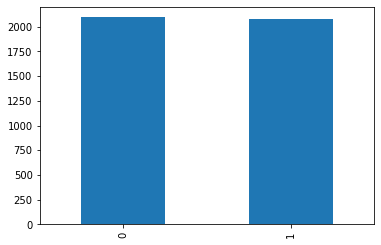

In [8]:
df["Class"].value_counts().plot(kind="bar")

In [9]:
# Save data
path_output = os.path.join(PATH_OUTPUT, "abalone.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/abalone.csv


In [10]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,-0.575179,-0.432763,-1.064838,-0.642383,-0.608183,-0.726599,-0.638650,1
1,-1.450045,-1.441081,-1.184418,-1.231151,-1.171896,-1.205783,-1.213668,0
2,0.049725,0.121812,-0.108206,-0.309734,-0.463873,-0.356942,-0.207386,0
3,-0.700160,-0.432763,-0.347364,-0.638301,-0.648770,-0.607943,-0.602711,1
4,-1.616686,-1.541913,-1.423576,-1.272987,-1.216993,-1.287929,-1.321484,0


In [11]:
path_preprocessed = os.path.join(PATH_PREPROCESSED, "abalone_scale.csv")
print(f"Save to: {path_preprocessed}")
df_preprocess.to_csv(path_preprocessed, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/preprocessed/abalone_scale.csv


## 2. Australian

In [12]:
path_data = os.path.join(PATH_DATA, "australian.dat")
col_names = ["A{}".format(i) for i in range(1, 15)] + ["Class"]
print(col_names)
df = pd.read_csv(path_data, sep="\s+", names=col_names, header=None)
df["Class"] = df["Class"].astype("category").cat.codes
print(df.shape)
df.head()

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'Class']
(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


<AxesSubplot:>

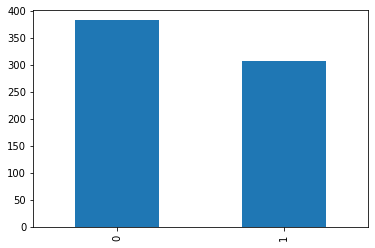

In [13]:
df["Class"].value_counts().plot(kind="bar")

In [14]:
path_output = os.path.join(PATH_OUTPUT, "australian.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/australian.csv


In [15]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,0.688737,-0.801052,1.347111,0.542950,-0.916282,-0.347965,-0.190906,-1.047504,-0.864196,-0.493887,1.087908,0.237828,-0.488358,0.037380,0
1,-1.451933,-0.751240,0.450548,0.542950,0.170499,-0.347965,-0.615536,-1.047504,-0.864196,-0.493887,-0.919195,0.237828,-0.139591,-0.195413,0
2,-1.451933,-0.167856,-0.604823,-1.783978,-0.916282,-0.347965,-0.291083,-1.047504,-0.864196,-0.493887,1.087908,0.237828,0.557943,-0.195413,0
3,-1.451933,-0.835667,1.355152,-1.783978,-0.644587,-0.850257,-0.664877,0.954650,1.157144,1.769760,1.087908,0.237828,-1.069637,-0.195413,1
4,0.688737,-0.962306,0.685745,0.542950,-0.372892,-0.347965,-0.078768,0.954650,1.157144,2.387119,-0.919195,0.237828,-0.720870,-0.165066,1


In [16]:
df_preprocess.to_csv(
    os.path.join(PATH_PREPROCESSED, "australian_scale.csv"), index=False
)

# 3. Banknote

In [17]:
path_data = os.path.join(PATH_DATA, "banknote.csv")
df = pd.read_csv(path_data)
df["Class"] = df["Class"].astype("category").cat.codes
print(df.shape)
df.head()

(1372, 5)


,variance,skewness,curtosis,entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<AxesSubplot:>

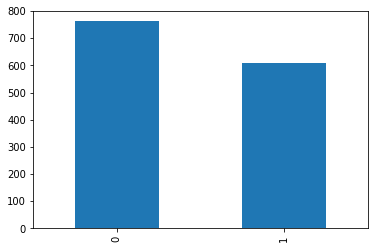

In [18]:
df["Class"].value_counts().plot(kind="bar")

In [19]:
path_output = os.path.join(PATH_OUTPUT, "banknote.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/banknote.csv


In [20]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,variance,skewness,curtosis,entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


In [21]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "banknote_scale.csv"), index=False)

## 4. Breast Cancer

In [22]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
col_names = dataset.feature_names

df = pd.DataFrame(X, columns=col_names)
df["Class"] = pd.Series(y, dtype="category").cat.codes

print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:>

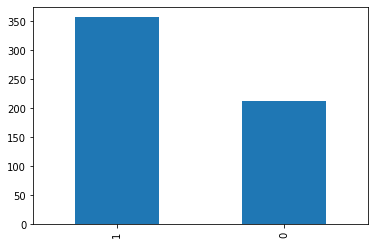

In [23]:
df["Class"].value_counts().plot(kind="bar")

In [24]:
path_output = os.path.join(PATH_OUTPUT, "breastcancer.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/breastcancer.csv


In [25]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


In [26]:
df_preprocess.to_csv(
    os.path.join(PATH_PREPROCESSED, "breastcancer_scale.csv"), index=False
)

## 5. CMC

In [27]:
path_data = os.path.join(PATH_DATA, "cmc.data")
col_names = [
    "W_age",
    "W_edu",
    "H_edu",
    "Children",
    "W_religion",
    "W_work",
    "H_occ",
    "SoL",
    "Media",
    "Class",
]
df = pd.read_csv(path_data, index_col=None, header=None, names=col_names)
df["Class"] = df["Class"].astype("category").cat.codes
print(df.shape)
df.head()

(1473, 10)


,W_age,W_edu,H_edu,Children,W_religion,W_work,H_occ,SoL,Media,Class
0,24,2,3,3,1,1,2,3,0,0
1,45,1,3,10,1,1,3,4,0,0
2,43,2,3,7,1,1,3,4,0,0
3,42,3,2,9,1,1,3,3,0,0
4,36,3,3,8,1,1,3,2,0,0


<AxesSubplot:>

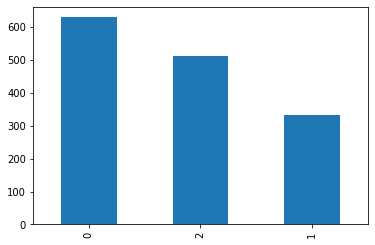

In [28]:
df["Class"].value_counts().plot(kind="bar")

In [29]:
path_output = os.path.join(PATH_OUTPUT, "cmc.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/cmc.csv


In [30]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,W_age,W_edu,H_edu,Children,W_religion,W_work,H_occ,SoL,Media,Class
0,-1.038167,-0.944748,-0.526590,-0.110856,0.419021,0.578134,-0.159403,-0.137053,-0.282687,0
1,1.515194,-1.930310,-0.526590,2.858078,0.419021,0.578134,0.997250,0.887716,-0.282687,0
2,1.272017,-0.944748,-0.526590,1.585678,0.419021,0.578134,0.997250,0.887716,-0.282687,0
3,1.150428,0.040814,-1.751973,2.433945,0.419021,0.578134,0.997250,-0.137053,-0.282687,0
4,0.420897,0.040814,-0.526590,2.009811,0.419021,0.578134,0.997250,-1.161823,-0.282687,0


In [31]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "cmc_scale.csv"), index=False)

## 6. HTRU2

In [32]:
path_data = os.path.join(PATH_DATA, "HTRU_2.csv")
col_names = ["A{}".format(i) for i in range(1, 9)] + ["Class"]
df = pd.read_csv(path_data, names=col_names, index_col=None, header=None)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(17898, 9)


,A1,A2,A3,A4,A5,A6,A7,A8,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


<AxesSubplot:>

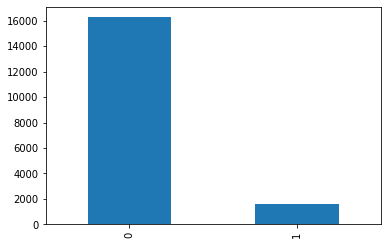

In [33]:
df["Class"].value_counts().plot(kind="bar")

<AxesSubplot:>

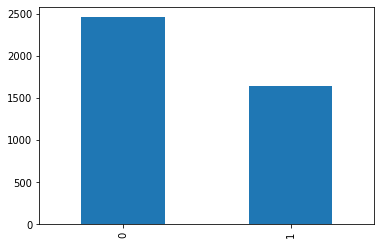

In [34]:
n = df[df["Class"] == 1].shape[0]

# Applying sampling change ratio to 2:3
df0 = df[df["Class"] == 0].sample(int(n * 1.5), replace=False)
df1 = df[df["Class"] == 1]
df = pd.concat([df0, df1])

df["Class"].value_counts().plot(kind="bar")

In [35]:
path_output = os.path.join(PATH_OUTPUT, "htru2_subset.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/htru2_subset.csv


In [36]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,A1,A2,A3,A4,A5,A6,A7,A8,Class
13522,1.094586,1.192763,-0.667176,-0.595963,-0.498189,-0.275810,-0.121990,-0.412687,0
10958,1.566772,-0.009310,-0.872921,-0.532373,-0.597106,-0.926553,1.365904,1.185950,0
2827,0.643012,1.302396,-0.591172,-0.605015,-0.585183,-0.990146,1.063217,1.040041,0
17829,0.476248,0.904728,-0.696817,-0.590749,-0.468490,-0.283773,-0.311707,-0.502528,0
12004,0.086299,-0.132768,-0.539056,-0.497016,-0.569337,-0.793021,0.560473,0.199521,0


In [37]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "htru2_scale.csv"), index=False)

## 7. Phoneme

In [38]:
path_data = os.path.join(PATH_DATA, "phoneme.csv")
df = pd.read_csv(path_data, index_col=None)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(5404, 6)


,V1,V2,V3,V4,V5,Class
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418,0
1,-0.641265,0.109245,0.292130,-0.916804,0.240223,0
2,0.870593,-0.459862,0.578159,0.806634,0.835248,0
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583,0
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127,0


<AxesSubplot:>

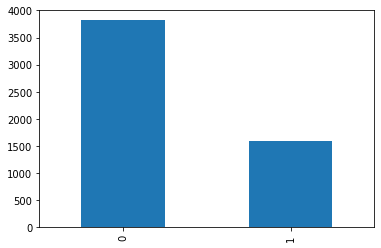

In [39]:
df["Class"].value_counts().plot(kind="bar")

In [40]:
df[df["Class"] == 0].shape[0] / df.shape[0]

0.7065136935603257

<AxesSubplot:>

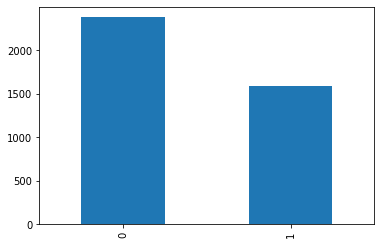

In [41]:
n = df[df["Class"] == 1].shape[0]

# Applying sampling change ratio to 2:3
df0 = df[df["Class"] == 0].sample(int(n * 1.5), replace=False)
df1 = df[df["Class"] == 1]
df = pd.concat([df0, df1])

df["Class"].value_counts().plot(kind="bar")

In [42]:
path_output = os.path.join(PATH_OUTPUT, "phoneme_subset.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/phoneme_subset.csv


In [43]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,V1,V2,V3,V4,V5,Class
2602,1.588575,-0.200138,-0.510578,-0.646178,-0.231448,0
2273,-0.229548,1.556405,0.722603,-1.144113,-0.154591,0
2739,-0.665758,-0.162762,1.991138,-1.705772,-0.154591,0
1944,-0.309350,1.257421,0.336560,-0.053485,-0.463254,0
4404,0.102769,1.840060,-1.397068,-0.785365,-0.355715,0


In [44]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "phoneme_scale.csv"), index=False)

## 8. Ringnorm

In [45]:
path_data = os.path.join(PATH_DATA, "ringnorm.dat")
col_names = ["A{}".format(i) for i in range(1, 21)] + ["Class"]
df = pd.read_csv(path_data, skiprows=26, names=col_names, header=None, index_col=None)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(7399, 21)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,Class
0,947.0,543.0,782.0,-449.0,-8.0,1316.0,756.0,-61.0,1604.0,1686.0,...,-382.0,1259.0,608.0,-2292.0,1008.0,2687.0,-1422.0,-606.0,2374.0,1
1,759.0,-314.0,898.0,-1743.0,2003.0,1117.0,911.0,136.0,-489.0,-144.0,...,112.0,598.0,474.0,2026.0,1431.0,-336.0,79.0,1123.0,302.0,1
2,531.0,1374.0,517.0,1226.0,1122.0,-4.0,-1227.0,2277.0,1083.0,888.0,...,1063.0,2454.0,587.0,-744.0,1216.0,916.0,-476.0,6.0,-477.0,1
3,-1443.0,1065.0,2071.0,207.0,-865.0,-786.0,2655.0,-366.0,971.0,-341.0,...,4195.0,-117.0,-2694.0,14.0,4097.0,1356.0,-944.0,-602.0,2348.0,0
4,-258.0,-4696.0,-519.0,6469.0,-1878.0,-557.0,-62.0,5572.0,-62.0,1813.0,...,1299.0,-1926.0,61.0,-2941.0,-1953.0,-1007.0,-1042.0,1835.0,-1196.0,0


<AxesSubplot:>

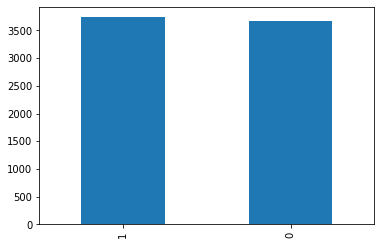

In [46]:
df["Class"].value_counts().plot(kind="bar")

In [47]:
path_output = os.path.join(PATH_OUTPUT, "ringnorm.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/ringnorm.csv


In [48]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,Class
0,0.494662,0.211748,0.386697,-0.448555,-0.132758,0.737099,0.365652,-0.191465,0.923351,0.985563,...,-0.388941,0.704609,0.286131,-1.669144,0.526515,1.654269,-1.044026,-0.545909,1.465324,1
1,0.368181,-0.359911,0.461879,-1.316791,1.217380,0.605509,0.467685,-0.058419,-0.440357,-0.247981,...,-0.060364,0.267292,0.195932,1.198461,0.804344,-0.372393,-0.063587,0.629271,0.068537,1
2,0.214789,0.766064,0.214944,0.675319,0.625897,-0.135762,-0.939714,1.387524,0.583890,0.447657,...,0.572180,1.495220,0.271995,-0.641109,0.663130,0.466965,-0.426108,-0.129940,-0.456606,1
3,-1.113261,0.559947,1.222127,-0.008399,-0.708128,-0.652865,1.615722,-0.397449,0.510916,-0.380772,...,2.655385,-0.205752,-1.936528,-0.137718,2.555390,0.761948,-0.731801,-0.543190,1.447796,0
4,-0.316028,-3.282909,-0.456511,4.193215,-1.388232,-0.501437,-0.172820,3.612831,-0.162142,1.071170,...,0.729152,-1.402585,-0.082068,-2.100148,-1.418289,-0.822241,-0.795814,1.113209,-0.941302,0


In [49]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "ringnorm_scale.csv"), index=False)

## 9. Texture

In [50]:
path_data = os.path.join(PATH_DATA, "texture.dat")
col_names = ["A{}".format(i) for i in range(1, 41)] + ["Class"]
df = pd.read_csv(path_data, skiprows=45, names=col_names, header=None, index_col=None)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(5500, 41)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A32,A33,A34,A35,A36,A37,A38,A39,A40,Class
0,-1.223,-0.798,-0.867,-0.639,-0.545,-0.412,-0.795,-0.629,-0.547,-0.868,...,-0.766,-0.555,-0.714,-0.545,-0.587,-0.871,-0.620,-0.568,-0.607,0
1,-1.410,-1.029,-1.013,-0.895,-0.762,-0.676,-1.043,-0.851,-0.775,-1.037,...,-0.919,-0.770,-0.847,-0.663,-0.723,-1.013,-0.748,-0.698,-0.817,0
2,-1.107,-0.649,-0.629,-0.492,-0.367,-0.298,-0.682,-0.478,-0.395,-0.681,...,-0.692,-0.445,-0.588,-0.371,-0.368,-0.746,-0.457,-0.379,-0.469,0
3,-1.270,-0.855,-0.958,-0.707,-0.619,-0.469,-0.872,-0.705,-0.620,-0.988,...,-0.829,-0.719,-0.774,-0.617,-0.688,-0.937,-0.693,-0.657,-0.779,0
4,-1.331,-0.862,-0.761,-0.689,-0.498,-0.361,-0.857,-0.600,-0.496,-0.779,...,-0.861,-0.571,-0.784,-0.545,-0.562,-0.952,-0.642,-0.578,-0.648,0


<AxesSubplot:>

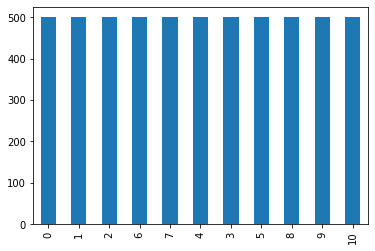

In [51]:
df["Class"].value_counts().plot(kind="bar")

In [52]:
path_output = os.path.join(PATH_OUTPUT, "texture.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/texture.csv


In [53]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A32,A33,A34,A35,A36,A37,A38,A39,A40,Class
0,-0.613097,-1.028195,-0.903285,-1.018106,-0.908456,-0.763383,-0.960534,-0.890625,-0.912126,-0.826953,...,-0.633416,-0.191022,-0.488950,-0.276889,0.037651,-0.557311,-0.312170,-0.223285,-0.127305,0
1,-1.532538,-2.152183,-1.369044,-2.130263,-1.828188,-1.949982,-2.198981,-1.895075,-1.878099,-1.344190,...,-1.442843,-0.841793,-1.411868,-0.891013,-0.760650,-1.422686,-0.918432,-0.868562,-0.806737,0
2,-0.042749,-0.303198,-0.144034,-0.379484,-0.154022,-0.250988,-0.396242,-0.207418,-0.268144,-0.254625,...,-0.241929,0.141931,0.385394,0.628684,1.323151,0.204462,0.459866,0.714849,0.319178,0
3,-0.844187,-1.305543,-1.193587,-1.313523,-1.222098,-1.019580,-1.345052,-1.234491,-1.221406,-1.194222,...,-0.966710,-0.687424,-0.905304,-0.651609,-0.555205,-0.959527,-0.657929,-0.665051,-0.683792,0
4,-1.144111,-1.339603,-0.565131,-1.235324,-0.709252,-0.534153,-1.270146,-0.759413,-0.696053,-0.554562,...,-1.136002,-0.239451,-0.974696,-0.276889,0.184398,-1.050940,-0.416372,-0.272921,-0.259956,0


In [54]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "texture_scale.csv"), index=False)

## 10. Yeast

In [55]:
path_data = os.path.join(PATH_DATA, "yeast.dat")
col_names = [
    "Mcg",
    "Gvh",
    "Alm",
    "Mit",
    "Erl",
    "Pox",
    "Vac",
    "Nuc",
    "Class",
]
output_names = [
    "MIT",
    "NUC",
    "CYT",
    "ME1",
    "ME2",
    "ME3",
    "EXC",
    "VAC",
    "POX",
    "ERL",
]
df = pd.read_csv(path_data, skiprows=13, names=col_names, header=None, index_col=None)
cattype = CategoricalDtype(categories=output_names, ordered=False)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(1484, 9)


,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


<AxesSubplot:>

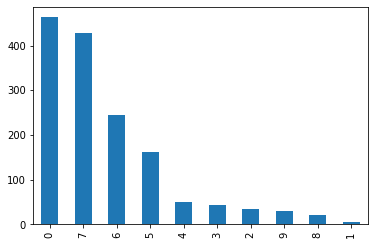

In [56]:
df["Class"].value_counts().plot(kind="bar")

(892, 9)


<AxesSubplot:>

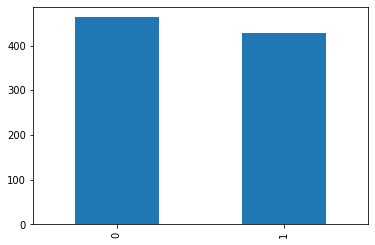

In [57]:
# Only select the major classes
df = df[(df["Class"] == 0) | (df["Class"] == 7)]

# Remap classes
cattype = CategoricalDtype(categories=[0, 7], ordered=True)
df["Class"] = df["Class"].astype(cattype).cat.codes

print(df.shape)
df["Class"].value_counts().plot(kind="bar")

In [58]:
path_output = os.path.join(PATH_OUTPUT, "yeast_subset.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/yeast_subset.csv


In [59]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
3,1.026911,-0.228006,0.607699,-0.868168,-0.088936,-0.033501,0.691290,-0.597676,1
5,0.390102,-0.623306,0.445695,-0.512732,-0.088936,29.849623,-0.109737,-0.597676,0
7,0.117184,-0.129181,0.931709,-0.246155,-0.088936,-0.033501,1.332111,0.384292,1
9,-0.610599,-0.722131,1.093713,-0.690450,-0.088936,-0.033501,1.332111,0.056970,0
10,-0.337680,-0.722131,0.121685,-0.157296,-0.088936,-0.033501,0.531084,-0.188522,1


In [60]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "yeast_scale.csv"), index=False)